# [Разбор реальной data science задачи](https://www.youtube.com/watch?v=RVUpCdVhF60&ab_channel=AlexanderErshov)

In [1]:
!python -m pip install nltk
!python -m pip install matplotlib
!python -m pip install scikit-learn
!python -m pip install pandas

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.2/287.2 kB 3.4 MB/s eta 0:00:0000:0100:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 5.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 1.1 MB/s eta 0:00:00a 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 1.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 745.0 kB/s eta 0:00:00a 0:00:01
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 222.3 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 245.0 kB/s eta 0:00:0000:0100:01
     ━━━━━━

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
nltk.download('stopwords')
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /Users/nikitav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nikitav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv("./data/labeled.csv", sep=",")

In [4]:
df.shape

(14412, 2)

In [12]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1.0
1,"Хохлы, это отдушина затюканого россиянина, мол...",1.0
2,Собаке - собачья смерть\n,1.0
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1.0
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1.0


In [6]:
# Функция апплай очень интересная, она применяется к каждой ячейке (здесь конкртно в инты преобразует)
# Кроме этого можно любую другую функцию вставиит
df["toxic"] = df["toxic"].apply(int)

In [7]:
df.head(5)

,comment,toxic
0,"Верблюдов-то за что? Дебилы, бл...\n",1
1,"Хохлы, это отдушина затюканого россиянина, мол...",1
2,Собаке - собачья смерть\n,1
3,"Страницу обнови, дебил. Это тоже не оскорблени...",1
4,"тебя не убедил 6-страничный пдф в том, что Скр...",1


In [8]:
# Группирует и потом считает элементы групп
df["toxic"].value_counts()

0    9586
1    4826
Name: toxic, dtype: int64

In [9]:
# тут еще нормирует и убирает Nan
df["toxic"].value_counts(normalize=True, dropna=True)

0    0.66514
1    0.33486
Name: toxic, dtype: float64

In [10]:
# выбираем 5 первых комментов из токсичных!
for c in df[df["toxic"] == 1]["comment"].tail(5):
    print(c)

ЖЕНЩИНА это ВЕНЕЦ ТВОРЕНИЯ, помните это ваньки! Вы все не стоите одной женской какашки, лошки! Женщины правят цивилизацией! На колени хуемрази! Феминизм победил! КНН

Сейчас все авиакомпании мира вместе со специалистами гугл карт смотрят на казахов и думают ну что за дебилы ну еп твое мать.

Вонючий совковый скот прибежал и ноет. А вот и сторонник демократии и свободы слова закукарекал.

А кого любить? Гоблина тупорылого что-ли? Или какую-нибудь продажную суку из демшизы? Нет уж, спасибо не надо.

КРЫМОТРЕД НАРУШАЕТ ПРАВИЛА РАЗДЕЛА Т.К В НЕМ НЕТ ОБСУЖДЕНИЯ ПОЛИТИКИ. СВОБОДНОЕ ОБЩЕНИЕ ЭТО В b. ЭТО ТОЖЕ САМОЕ ЕСЛИ Я НА ДОСКЕ О ПОЛИТИКЕ СОЗДАМ ТРЕД О ТОМ КАК ПЛОХО БЕЗ ТЯНОЧКИ. ТАК ЧТО УЕБЫВАЙТЕ В Б ИЛИ НВР СО СВОИМ ЧАТИКОМ ПРЕСТАРЕЛЫХ ГОМОСЕКОВ!



In [18]:
for c in df[df["toxic"] == 0]["comment"].head(5):
    print(c)


В шапке были ссылки на инфу по текущему фильму марвел. Эти ссылки были заменены на фразу Репортим брипидора, игнорируем его посты. Если этого недостаточно, чтобы понять, что модератор абсолютный неадекват, и его нужно лишить полномочий, тогда эта борда пробивает абсолютное дно по неадекватности.

Почитайте посты у этого автора,может найдете что нибудь полезное. Надеюсь помог) https: pikabu.ru story obyichnyie budni dezsluzhbyi 4932098

Про графику было обидно) я так то проходил все серии гта со второй части по пятую, кроме гта 4. И мне не мешала графика ни в одной из частей. На компе у меня было куча видеокарт. Начиная с 32мб RIVA TNT и заканчивая 2Гб 560Ti на которой я спокойно играю который год в танки, гта5, ведьмака3 купил на распродаже и начал проходить. Да, не на ультрах. С пониженными текстурами. И не мешает. Я не понимаю дрочева на графике, требовать графику уровня плойки 4 минимум. Мне надо чтобы глаза не резало, только и всего. По поводу управления, мне не хватает переходника

In [18]:
# Функция для разбиения датасета на обучающую и на тестовую
train_df, test_df = train_test_split(df, test_size=500)

In [20]:
test_df.shape

(500, 2)

In [21]:
test_df["toxic"].value_counts()

0    342
1    158
Name: toxic, dtype: int64

In [22]:
train_df["toxic"].value_counts()

0    9244
1    4668
Name: toxic, dtype: int64

In [11]:
# Берем текст 
sentence_example = df.iloc[1]["comment"]
# Ткенизация 
tokens = word_tokenize(sentence_example, language="russian")
# удаляем токены без смысловой нагрузки( знаки пунктуаци предлоги, междоментия)
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation]

# Подгружаем русские стоп слова 
russian_stop_words = stopwords.words("russian")
# и удаляем их
tokens_without_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words]
# стемминг - приводим к нижнему регистру и удаляем суффиксы и приставки
snowball = SnowballStemmer(language="russian")
# итоговая функция 
stemmed_tokens = [snowball.stem(i) for i in tokens_without_stop_words_and_punctuation]



In [12]:
print(f"Исходный текст: {sentence_example}")
print("-----------------")
print(f"Токены: {tokens}")
print("-----------------")
print(f"Токены без пунктуации: {tokens_without_punctuation}")
print("-----------------")
print(f"Токены без пунктуации и стоп слов: {tokens_without_stop_words_and_punctuation}")
print("-----------------")
print(f"Токены после стемминга: {stemmed_tokens}")
print("-----------------")

Исходный текст: Хохлы, это отдушина затюканого россиянина, мол, вон, а у хохлов еще хуже. Если бы хохлов не было, кисель их бы придумал.

-----------------
Токены: ['Хохлы', ',', 'это', 'отдушина', 'затюканого', 'россиянина', ',', 'мол', ',', 'вон', ',', 'а', 'у', 'хохлов', 'еще', 'хуже', '.', 'Если', 'бы', 'хохлов', 'не', 'было', ',', 'кисель', 'их', 'бы', 'придумал', '.']
-----------------
Токены без пунктуации: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'а', 'у', 'хохлов', 'еще', 'хуже', 'Если', 'бы', 'хохлов', 'не', 'было', 'кисель', 'их', 'бы', 'придумал']
-----------------
Токены без пунктуации и стоп слов: ['Хохлы', 'это', 'отдушина', 'затюканого', 'россиянина', 'мол', 'вон', 'хохлов', 'хуже', 'Если', 'хохлов', 'кисель', 'придумал']
-----------------
Токены после стемминга: ['хохл', 'эт', 'отдушин', 'затюкан', 'россиянин', 'мол', 'вон', 'хохл', 'хуж', 'есл', 'хохл', 'кисел', 'придума']
-----------------


In [14]:
# Пишем функцию для кажого предложения в датафреме
snowball = SnowballStemmer(language="russian")
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [15]:
tokenize_sentence(sentence_example)

['хохл',
 'эт',
 'отдушин',
 'затюкан',
 'россиянин',
 'мол',
 'вон',
 'хохл',
 'хуж',
 'есл',
 'хохл',
 'кисел',
 'придума']

In [16]:
# Базой вариант векторизации, вставляем наш токенайщер туда 
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))


In [20]:
# Функция фит трансформ обучает! и Возвращает готовые фичи
features = vectorizer.fit_transform(train_df["comment"])

In [22]:
# Здесь мы обучаем модель логистической регресси
# рэндом стайт для воспроизводимости
model = LogisticRegression(random_state=0) 

model.fit(features, train_df["toxic"])

LogisticRegression(random_state=0)

In [23]:
# Возвразает решение по первому комментарию
model.predict(features[0])

array([0])

# Вот тонкая разница между двумя функциями:

- loc выбирает строки и столбцы с определенными метками (типа столбикик А, с метрикой В)
- iloc выбирает строки и столбцы в определенных целочисленных позициях (срез делаем по 3-6)

In [35]:
# Читаем этот первый комментарий
train_df["comment"].iloc[0]

'Я в курсе что кабеля на айфон разные бывают, я даже в актуальное время 2g айфоном пользовался и знаю что с 5го айфона кабель поменялся, и до настоящего времени он как на 5ке. Но на картинке скорее всего от самсунга.\n'

In [24]:
# В сайкитлерн существует класс пайплайн 
# Он уже принимает предложения а не вещественные вектора
model_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0))
]
)

In [25]:
# передаем список предложений и лейбл предложения 
model_pipeline.fit(train_df["comment"], train_df["toxic"])

/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x1780adee0>)),
                ('model', LogisticRegression(random_state=0))])

In [27]:
# тестируем позитивным текстом
model_pipeline.predict(["Привет, у меня все нормально"])

array([0])

In [28]:
# тестируем агрессивный комментарий
model_pipeline.predict(["Слушай не пойти ли тебе нафиг отсюда?"])

array([1])

In [29]:
# Нам важны метрики прессижн и рекол
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict(test_df["comment"]))
# Функция предикт сравнивает вероятность с порогом и принимает рещение


0.9035087719298246

# Поэтому меняя ПОРОГ(пресижн) мы меняем присижн и рекол

In [30]:
# Рекол 
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict(test_df["comment"]))


0.6319018404907976

In [31]:
prec, rec, thresholds = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1])


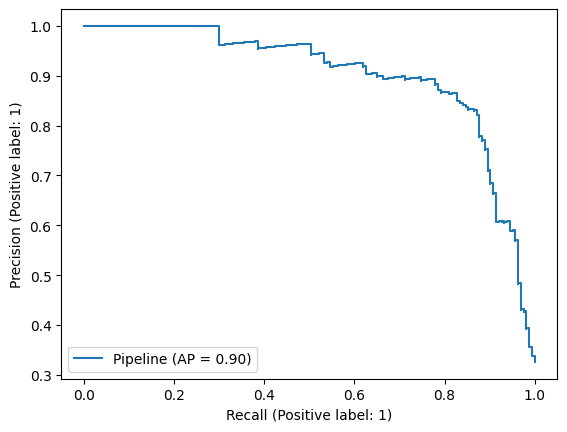

In [38]:
# plot_precision_recall_curve(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(estimator=model_pipeline, X=test_df["comment"], y=test_df["toxic"])

In [39]:
# Возвращает индексы элементов, что значение больше 0.95
np.where(prec > 0.95)
# Начиная с 413 знаяения порог нас устраивает

(array([413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
        426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
        439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
        452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
        465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
        478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
        491, 492, 493, 494, 495, 496, 497, 498, 499]),)

In [42]:
# Выбираем из трешхолдс индекс, нас устраивающий
# Это порог принятия решения Н1 или Н0
thresholds[413]

0.6022669853015323

В зависимости от выбраной метрики надо бустить что-то

Здесь мы бустим пресижн

In [45]:
# по просижену мы вписались 
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[413])


0.9647058823529412

In [46]:
# он уменьшился, но вообще не маленький
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline.predict_proba(test_df["comment"])[:, 1] > thresholds[413])


0.5030674846625767

Воспользуемся классом sklearn gridsearchcv

Он позволяет перебирать параметры логистической регрессии

С - это коэффициент регуляризации вот его и будем менять(1 стандарт)

CV -  3 фолда во время кроссвалидации

Verbose - все выводим в командную строку

In [48]:
grid_pipeline = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", 
     GridSearchCV(
        LogisticRegression(random_state=0),
        param_grid={'C': [0.1, 1, 10.]},
        cv=3,
         verbose=4
        )
    )
])


In [49]:
grid_pipeline.fit(train_df["comment"], train_df["toxic"])

/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .............................C=0.1;, score=0.686 total time=   0.2s
[CV 2/3] END .............................C=0.1;, score=0.686 total time=   0.4s
[CV 3/3] END .............................C=0.1;, score=0.687 total time=   0.2s
[CV 1/3] END ...............................C=1;, score=0.842 total time=   0.6s
[CV 2/3] END ...............................C=1;, score=0.837 total time=   0.4s
[CV 3/3] END ...............................C=1;, score=0.833 total time=   0.3s


/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/3] END ............................C=10.0;, score=0.868 total time=   0.7s


/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/3] END ............................C=10.0;, score=0.863 total time=   0.6s


/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/3] END ............................C=10.0;, score=0.866 total time=   0.6s


/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x1787444c0>)),
                ('model',
                 GridSearchCV(cv=3,
                              estimator=LogisticRegression(random_state=0),
                              param_grid={'C': [0.1, 1, 10.0]}, verbose=4))])

[CV 3/3] END ............................C=10.0;, score=0.866 total time=   0.6s
/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

коэффициент регуляризации
Лучший вариант при С =10 но модель не сошлась

Завпишим функцию с С=10

In [52]:

model_pipeline_c_10 = Pipeline([
    ("vectorizer", TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))),
    ("model", LogisticRegression(random_state=0, C=10.))
]
)


In [53]:
model_pipeline_c_10.fit(train_df["comment"], train_df["toxic"])

/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/nikitav/Desktop/ITMO/my_courses/My_education/.conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x178599040>)),
                ('model', LogisticRegression(C=10.0, random_state=0))])

In [54]:
prec_c_10, rec_c_10, thresholds_c_10 = precision_recall_curve(y_true=test_df["toxic"], probas_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1])


In [55]:
np.where(prec_c_10 > 0.95)

(array([409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421,
        422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434,
        435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447,
        448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460,
        461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473,
        474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486,
        487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]),)

In [56]:
precision_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[409])


0.9662921348314607

In [57]:
recall_score(y_true=test_df["toxic"], y_pred=model_pipeline_c_10.predict_proba(test_df["comment"])[:, 1] > thresholds_c_10[409])


0.5276073619631901

повышение рекола говорит нам о том, что мы смогли повысить правильность нахождения токсичных комментариев, при этом сохранить пресижн на уровне 0.95